## **Customer Churn Prediction**




# Step 1: Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('/content/customer_churn_large_dataset.xlsx')

In [5]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
df["Location"].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

## Converting categorical data

In [7]:
df['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
df['Location'].replace(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],[0, 1, 2, 3, 4], inplace=True)
df.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,0,17,73.36,236,0
1,2,Customer_2,62,1,1,1,48.76,172,0
2,3,Customer_3,24,1,0,5,85.47,460,0
3,4,Customer_4,36,1,2,3,97.94,297,1
4,5,Customer_5,46,1,2,19,58.14,266,0


# Step 2: Summarising the Dataset


In [8]:
# Total rows and columns
df.shape

(100000, 9)

In [9]:
print(df['Churn'].value_counts())

0    50221
1    49779
Name: Churn, dtype: int64


In [10]:
# Finding null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

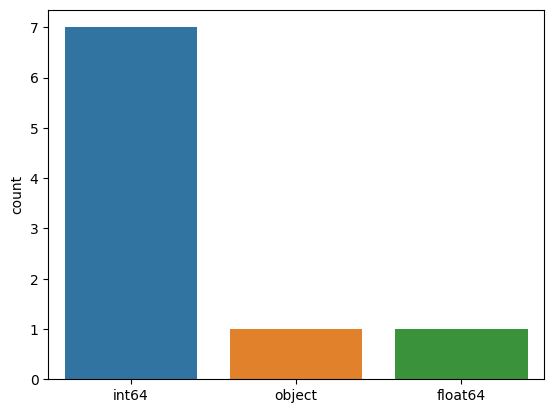

In [11]:
# finding datatype from our dataset
sns.countplot(x=df.dtypes, data=df)
plt.show()

In [66]:
# descriptive statistics
df.describe()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,0.502160,2.003770,12.490100,65.053231,274.393980,0.497790
std,28850.546437,15.280283,0.499998,1.416205,6.926461,20.218463,130.383266,0.499998
min,1000.990000,18.000000,0.000000,0.000000,1.000000,30.720000,54.000000,0.000000
25%,25000.750000,31.000000,0.000000,1.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,1.000000,2.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,1.000000,3.000000,19.000000,82.640000,387.000000,1.000000
max,99000.010000,70.000000,1.000000,4.000000,24.000000,99.290000,496.000000,1.000000


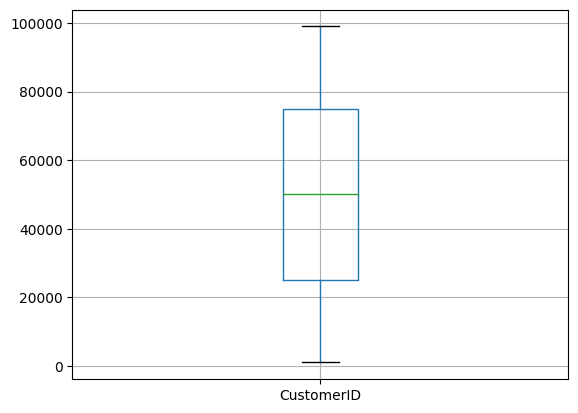

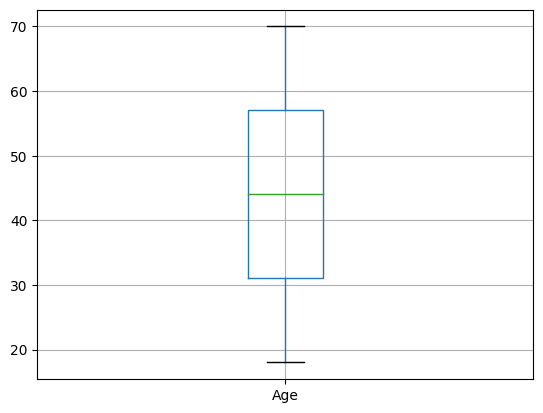

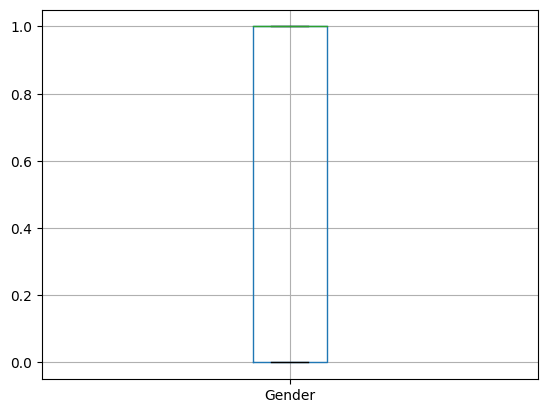

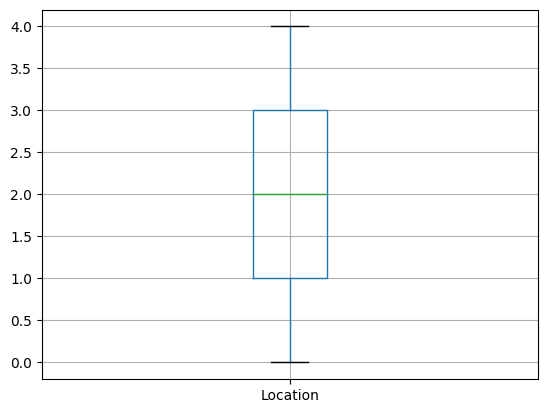

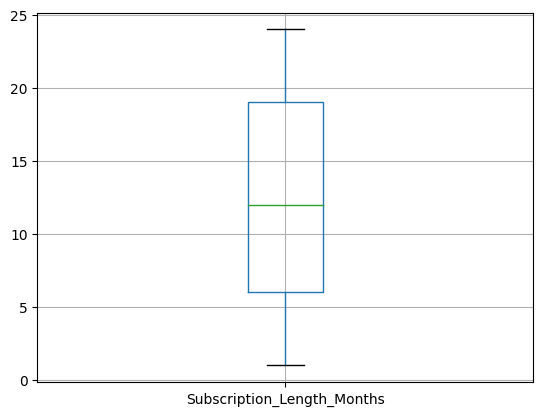

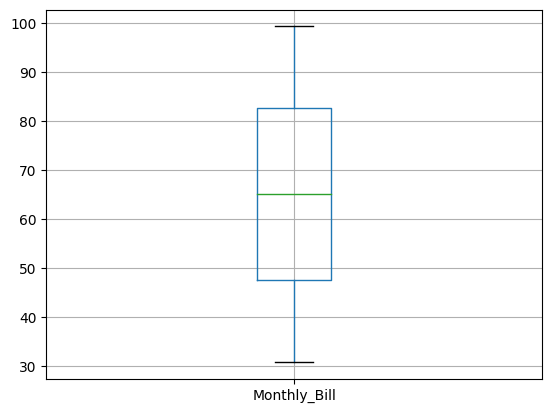

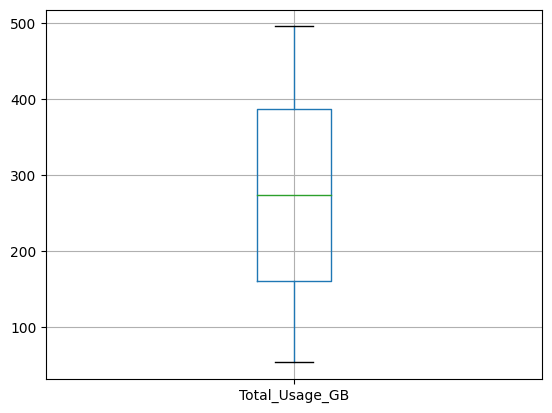

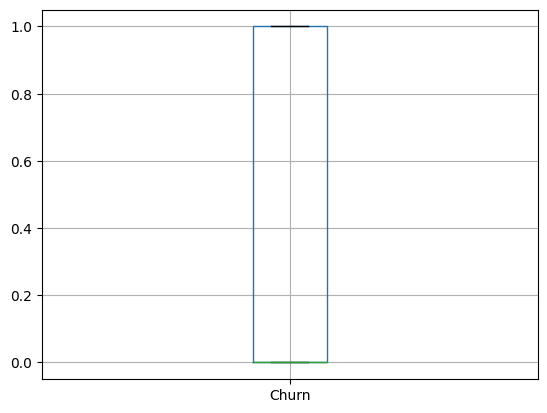

In [67]:
# Checking for outliers
def boxplot(data,feat):
  df.boxplot(column = [feat])
  plt.show()

column_name = ["CustomerID","Age","Gender","Location","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB","Churn"]
for col in column_name:
  boxplot(df,col)

<Figure size 640x160 with 0 Axes>

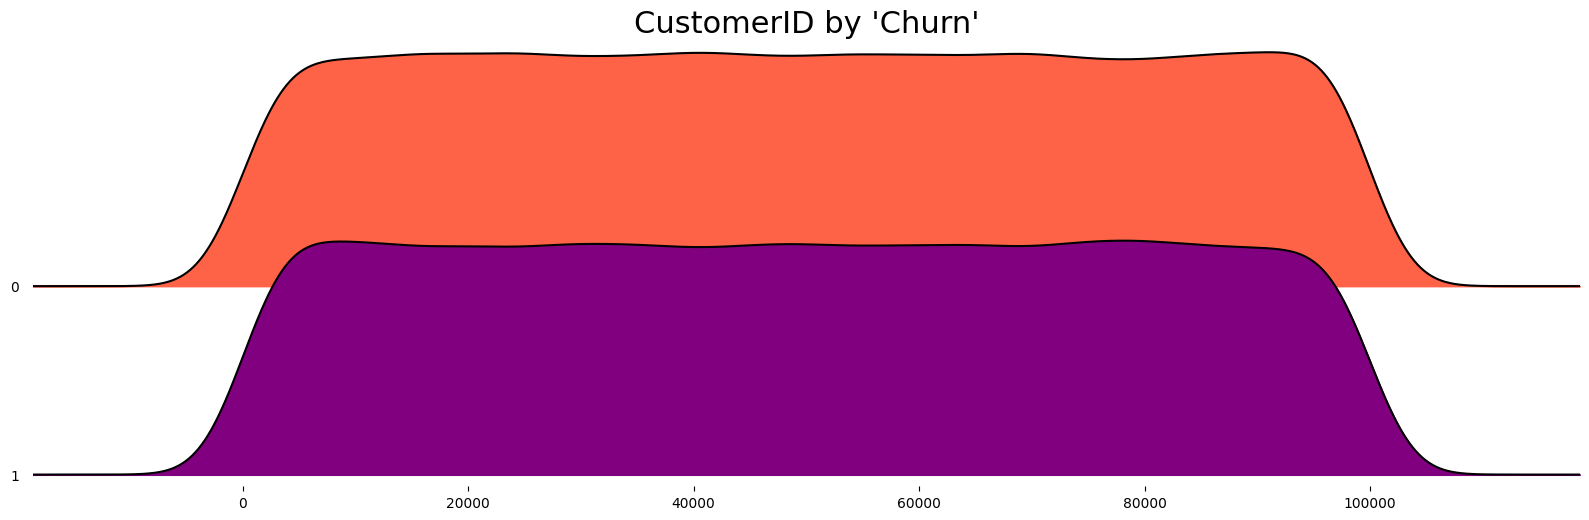

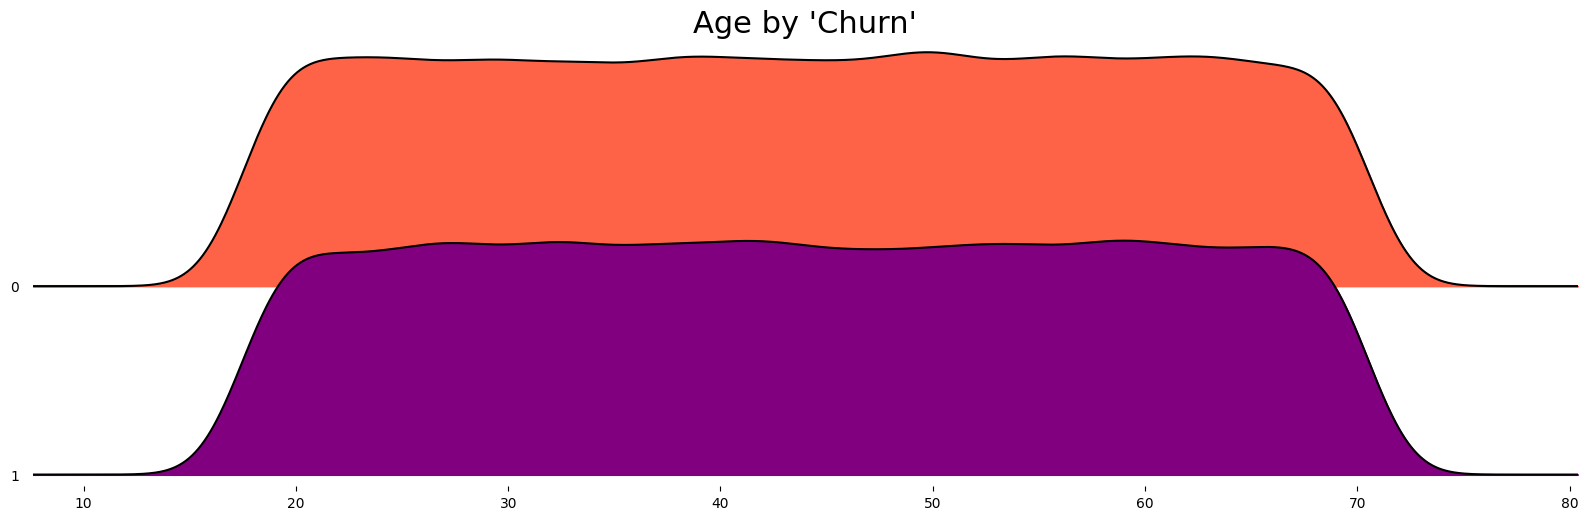

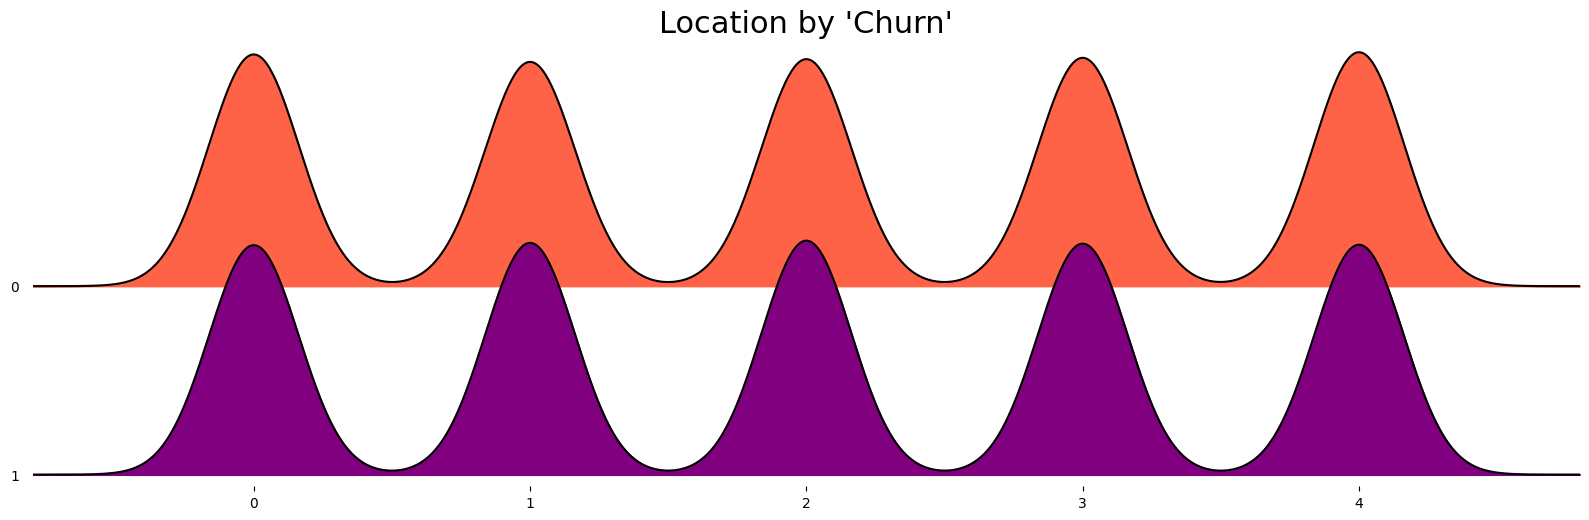

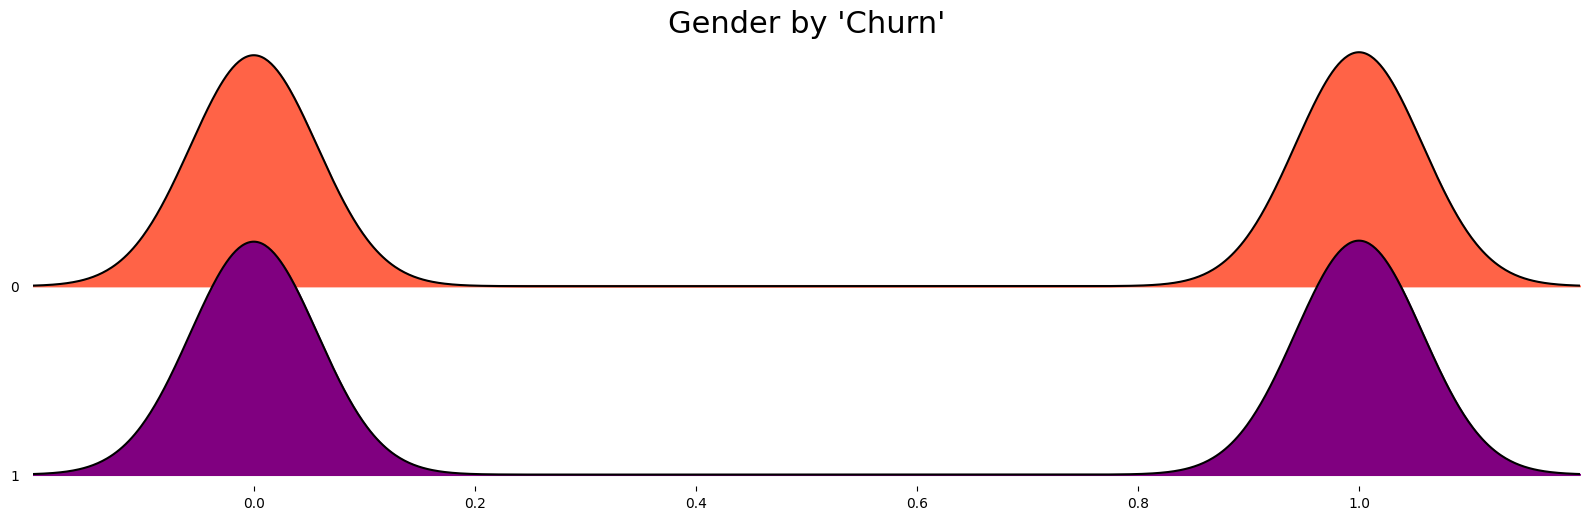

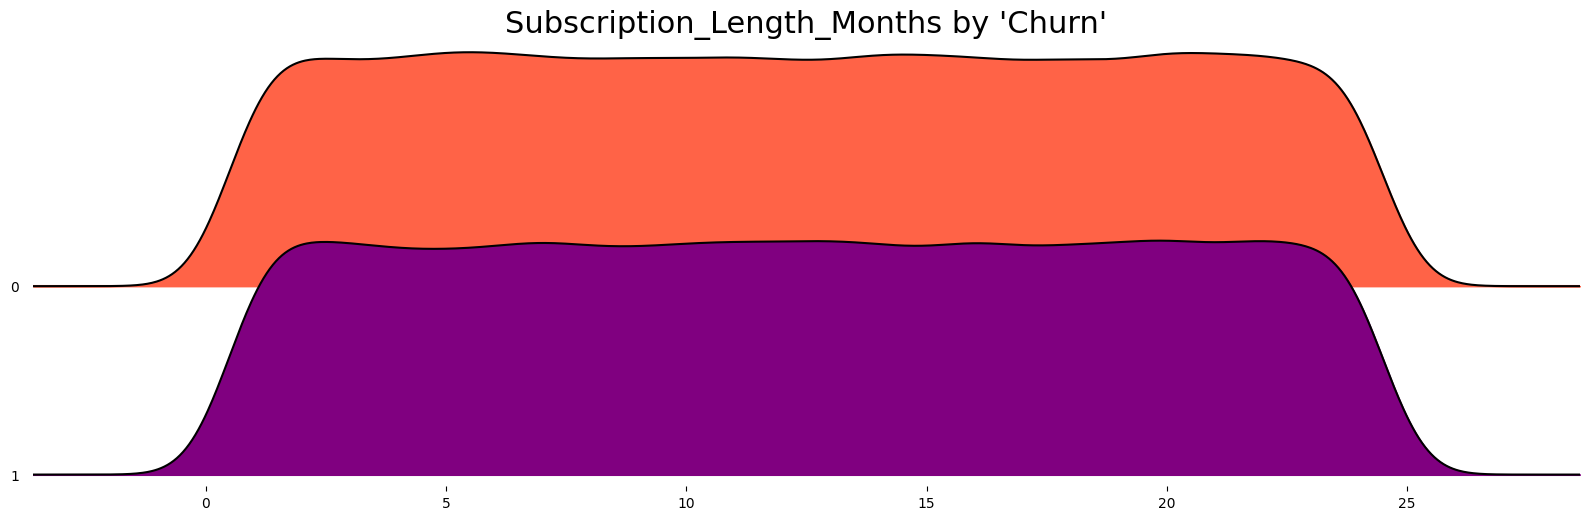

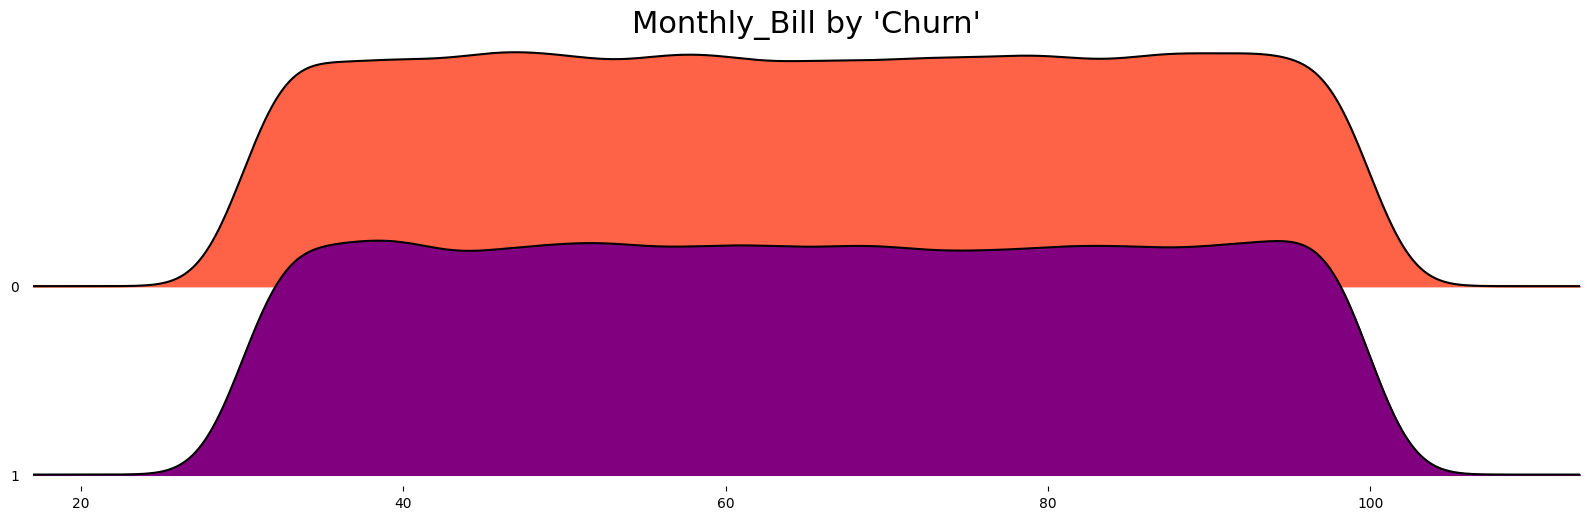

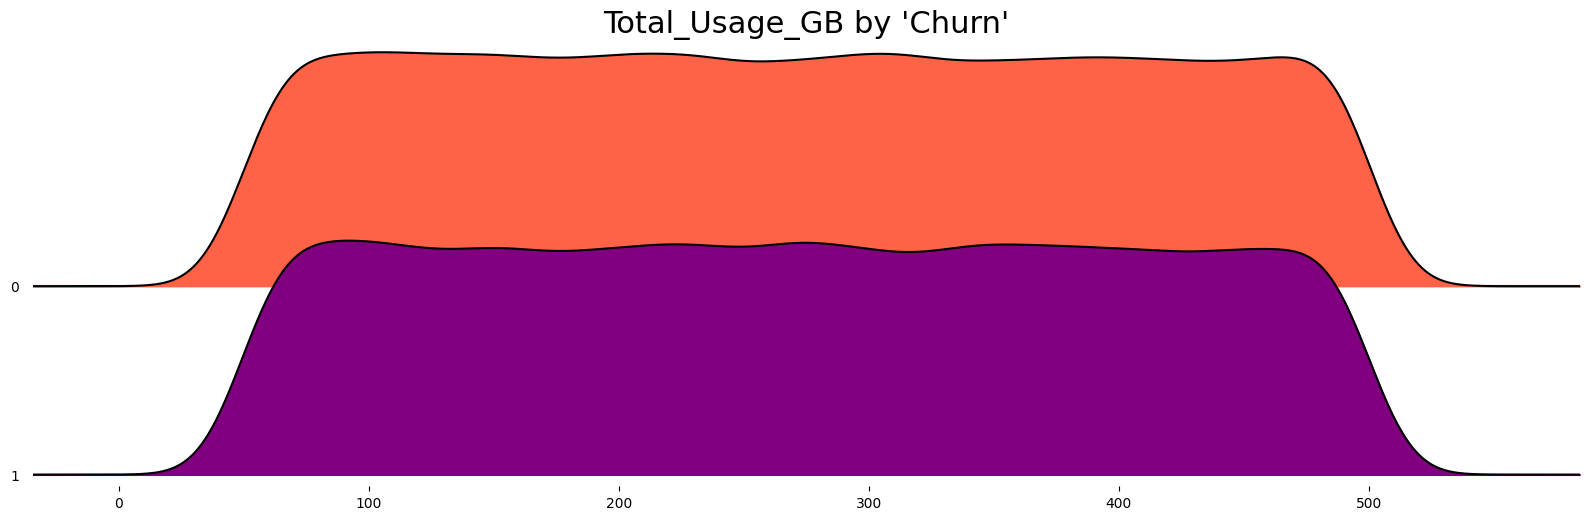

In [68]:
# JoyPlot
#!pip install joypy
#!python -c "import joypy; print(joypy.__version__)"


import joypy
column_name = ["CustomerID","Age","Location","Gender","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB"]

plt.figure(figsize=(8,2), dpi= 80)
for i,var in enumerate(column_name):
    joypy.joyplot(df, column=[var], by="Churn", ylim='own', figsize=(16,5), color=['tomato', 'purple']);
    plt.title(f"{var} by 'Churn'", fontsize=22)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


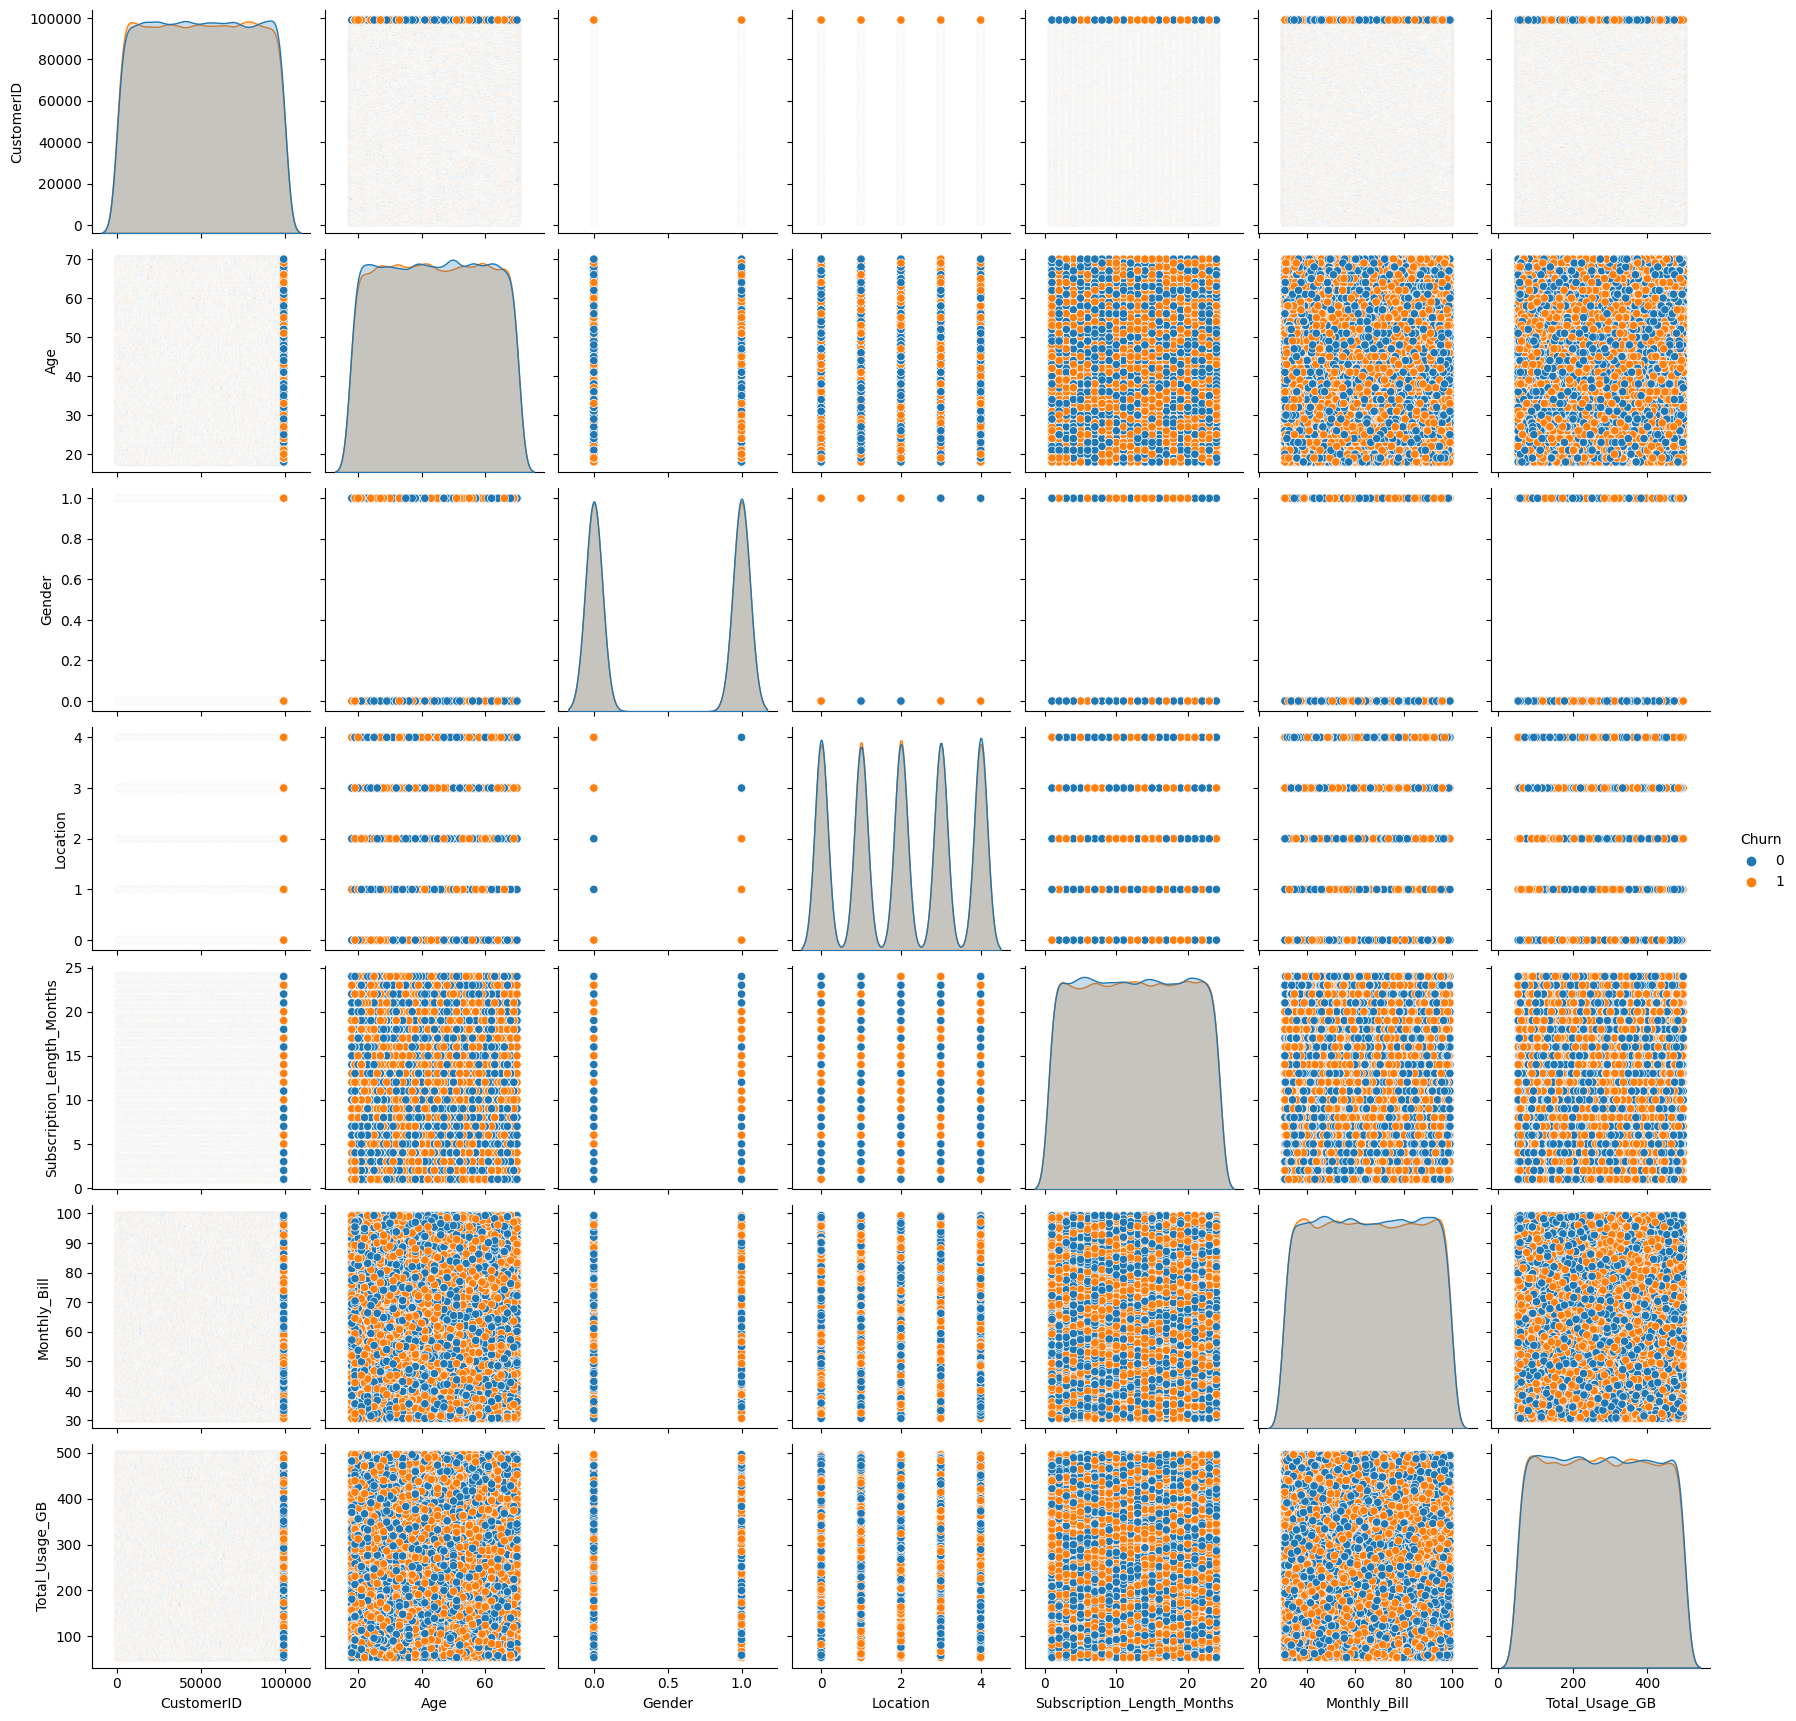

In [69]:
# Pairplot
sns.pairplot(df,hue ="Churn",size=2.5)
plt.show()

<ipython-input-70-46a09e6c2bb7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')


<Axes: >

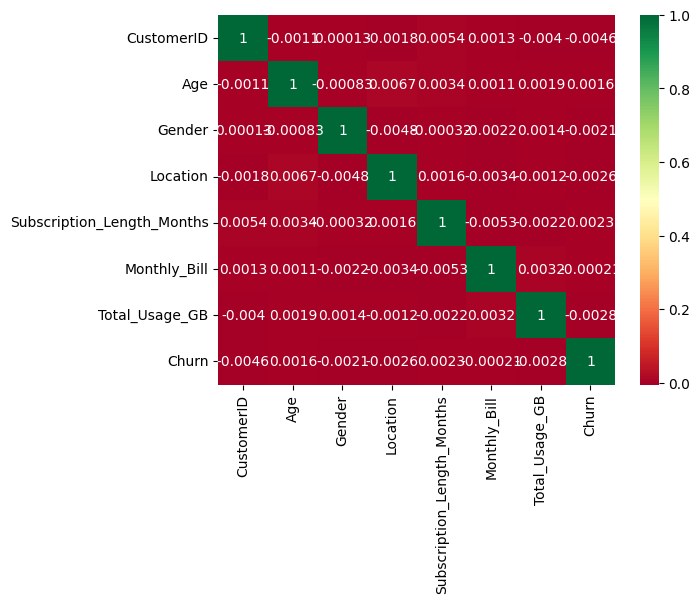

In [70]:
# HeatMap
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

# Step 3: Applying Logistic Regression


In [31]:
X = df[["Age","Gender","Location","Subscription_Length_Months","Monthly_Bill","Total_Usage_GB"]]
y = df["Churn"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [33]:
from sklearn import linear_model
from sklearn import metrics
lr = linear_model.LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [34]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


# Step 4: After applying Normalisation


In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = linear_model.LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set after Normalization: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set after Normalization: 0.50


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.74      0.60     10036
           1       0.49      0.26      0.34      9964

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000



# Step 4: Applying Cross-Validation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.5)

lr.fit(X1, y1)
y2_model = lr.predict(X2)
accuracy_score(y2, y2_model)

0.5003

In [38]:
y2_model = lr.fit(X1, y1).predict(X2)
y1_model = lr.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.49928, 0.5003)

## In order to Deploy our model to need to save our model

In [39]:
import pickle
filename = 'trained_model.sav'
pickle.dump(lr,open(filename,'wb'))

In [42]:
#loading the model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [41]:

input_data = np.array([60, 1, 0, 100, 110, 235])   #taking user input

input_data_as_numpy_array = np.asarray(input_data) # Convert to numpy array


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # it's reshaping the data into a 2D array with one row and as many columns as there are elements in
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is Happy :)')
else:
  print('The person is not Happy :(')


[1]
The person is not Happy :(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
